# 1. Set Up the Database

In [1]:
import sqlite3

# Create a connection to the db
connection = sqlite3.connect('student_grades.db')

# Create a cursor object
cursor = connection.cursor()

# 2. Create the Necessary Tables

Create the students table

In [2]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')

print("Students table created!")

Students table created!


Create the grades table

In [3]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER NOT NULL,
    subject TEXT NOT NULL,
    grade INTEGER NOT NULL,
    FOREIGN KEY (student_id) REFERENCES students (student_id)
)
''')

print("Grades table created!")

Grades table created!


# 3. Insert into the Tables

Insert into the students table

In [4]:
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Green')
]

# Insert data into the table
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

# Commit the transaction
connection.commit()

Insert into the grades table

In [5]:
grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 99),
    (3, 'English', 98),
    (3, 'History', 92),
    (4, 'Math', 73),
    (4, 'English', 79),
    (4, 'History', 86),
    (5, 'Math', 86),
    (5, 'English', 89),
    (5, 'History', 91)
]

# Insert data into the data
cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

# Commit the transaction
connection.commit()

# 4. Perform SQL Queries

1. Retrieve all students' names and their grades

In [6]:
cursor.execute('''SELECT students.first_name, students.last_name, grades.grade
                  FROM students
                  JOIN grades ON students.student_id = grades.student_id;''')
rows = cursor.fetchall()

# Print the results
print("All students names and grades:")
for row in rows:
    print(row)

All students names and grades:
('Alice', 'Johnson', 95)
('Alice', 'Johnson', 88)
('Alice', 'Johnson', 90)
('Bob', 'Smith', 82)
('Bob', 'Smith', 76)
('Bob', 'Smith', 85)
('Carol', 'White', 99)
('Carol', 'White', 98)
('Carol', 'White', 92)
('David', 'Brown', 73)
('David', 'Brown', 79)
('David', 'Brown', 86)
('Eve', 'Green', 86)
('Eve', 'Green', 89)
('Eve', 'Green', 91)
('Alice', 'Johnson', 95)
('Alice', 'Johnson', 88)
('Alice', 'Johnson', 90)
('Bob', 'Smith', 82)
('Bob', 'Smith', 76)
('Bob', 'Smith', 85)
('Carol', 'White', 99)
('Carol', 'White', 98)
('Carol', 'White', 92)
('David', 'Brown', 73)
('David', 'Brown', 79)
('David', 'Brown', 86)
('Eve', 'Green', 86)
('Eve', 'Green', 89)
('Eve', 'Green', 91)
('Alice', 'Johnson', 95)
('Alice', 'Johnson', 88)
('Alice', 'Johnson', 90)
('Bob', 'Smith', 82)
('Bob', 'Smith', 76)
('Bob', 'Smith', 85)
('Carol', 'White', 99)
('Carol', 'White', 98)
('Carol', 'White', 92)
('David', 'Brown', 73)
('David', 'Brown', 79)
('David', 'Brown', 86)
('Eve', 'Green'

2. Find the average grade for each student

In [7]:
cursor.execute('''SELECT AVG(grades.grade) AS average_grade, students.first_name, students.last_name
                  FROM students
                  JOIN grades ON students.student_id = grades.student_id
                  GROUP BY students.student_id, students.first_name, students.last_name;''')

rows = cursor.fetchall()

# Print the results
print("Average grade for each student:")
for row in rows:
    print(row)

Average grade for each student:
(91.0, 'Alice', 'Johnson')
(81.0, 'Bob', 'Smith')
(96.33333333333333, 'Carol', 'White')
(79.33333333333333, 'David', 'Brown')
(88.66666666666667, 'Eve', 'Green')


3. Find the student with the highest average grade

In [8]:
cursor.execute('''SELECT AVG(grades.grade) AS average_grade, students.first_name, students.last_name
                  FROM students
                  JOIN grades ON students.student_id = grades.student_id
                  GROUP BY students.student_id, students.first_name, students.last_name
                  ORDER BY average_grade DESC
                  LIMIT 1;''')

rows = cursor.fetchall()
print("Student with the highest average grade:")
for row in rows:
    print(row)

Student with the highest average grade:
(96.33333333333333, 'Carol', 'White')


4. Find the average grade for the Math subject

In [9]:
cursor.execute('''SELECT AVG(grades.grade) AS average_math_grade
                  FROM students
                  JOIN grades on students.student_id = grades.student_id
                  WHERE grades.subject = 'Math';''')

rows = cursor.fetchall()
print("Average math grade:")
for row in rows:
    print(row)

Average math grade:
(87.0,)


5. List all students who scored above 90 in any subject

In [10]:
cursor.execute('''SELECT DISTINCT students.first_name, students.last_name
                  FROM students
                  JOIN grades ON students.student_id = grades.student_id
                  WHERE grades.grade > 90''')

rows = cursor.fetchall()
print("Students who scored above 90 in any subject:")
for row in rows:
    print(row)

Students who scored above 90 in any subject:
('Alice', 'Johnson')
('Carol', 'White')
('Eve', 'Green')


# 5. Load Data into Pandas

 1. Use Pandas to load the data from the students and grades tables into DataFrames

In [11]:
import pandas as pd

students_df = pd.read_sql_query('SELECT * FROM students', connection)
grades_df = pd.read_sql_query('SELECT * FROM grades', connection)

# View the DataFrames
print("Students DataFrame:")
print(students_df)
print("\nGrades DataFrame:")
print(grades_df)

Students DataFrame:
    student_id first_name last_name
0            1      Alice   Johnson
1            2        Bob     Smith
2            3      Carol     White
3            4      David     Brown
4            5        Eve     Green
5            6      Alice   Johnson
6            7        Bob     Smith
7            8      Carol     White
8            9      David     Brown
9           10        Eve     Green
10          11      Alice   Johnson
11          12        Bob     Smith
12          13      Carol     White
13          14      David     Brown
14          15        Eve     Green
15          16      Alice   Johnson
16          17        Bob     Smith
17          18      Carol     White
18          19      David     Brown
19          20        Eve     Green
20          21      Alice   Johnson
21          22        Bob     Smith
22          23      Carol     White
23          24      David     Brown
24          25        Eve     Green

Grades DataFrame:
    grade_id  student_id 

2. Use JOIN queries to combine the data from both tables into a single DataFrame that includes each student's name, subject, and grade

In [12]:
student_grade_subject_df = pd.read_sql_query('''SELECT students.first_name, students.last_name, grades.subject, grades.grade
                                                FROM students
                                                JOIN grades ON students.student_id = grades.student_id''', connection)

print("Student Grade Subject DataFrame:")
print(student_grade_subject_df)

Student Grade Subject DataFrame:
   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
..        ...       ...      ...    ...
70      David     Brown  English     79
71      David     Brown  History     86
72        Eve     Green     Math     86
73        Eve     Green  English     89
74        Eve     Green  History     91

[75 rows x 4 columns]


3. Visualize the data with Matplotlib

Plot the average grades for each student

Average Grade by Student:
  first_name last_name  avg_grade
0      Alice   Johnson  91.000000
1        Bob     Smith  81.000000
2      Carol     White  96.333333
3      David     Brown  79.333333
4        Eve     Green  88.666667


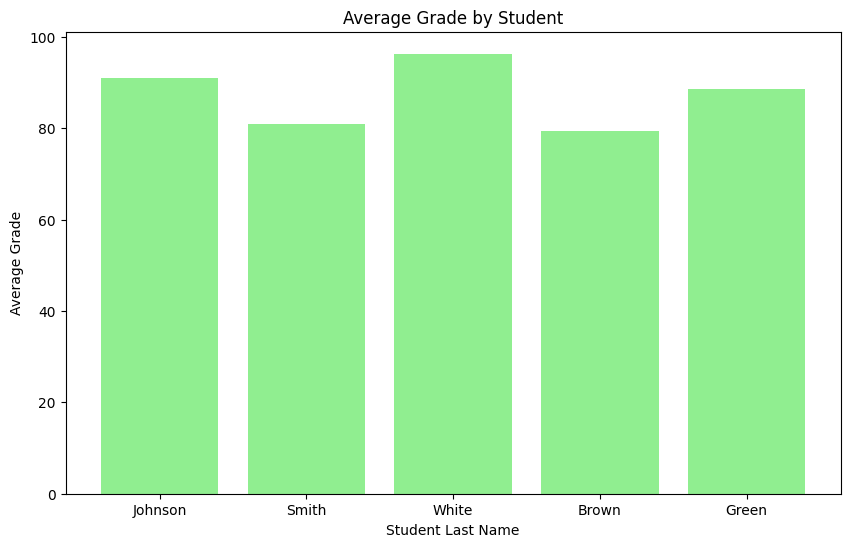

In [13]:
import matplotlib.pyplot as plt

# Get DataFrame of the average grade for each student
student_avg_grade_df = student_grade_subject_df.groupby(['first_name', 'last_name'])['grade'].mean().reset_index() # reset_index() makes first_name and last_naem normal columns again
student_avg_grade_df.rename(columns={'grade': 'avg_grade'}, inplace=True)

# Double check that it looks right
print("Average Grade by Student:")
print(student_avg_grade_df)

# Plot the DataFrame
plt.figure(figsize=(10,6))
plt.bar(student_avg_grade_df['last_name'], student_avg_grade_df['avg_grade'], color='lightgreen')
plt.xlabel('Student Last Name')
plt.ylabel('Average Grade')
plt.title('Average Grade by Student')
plt.show()

Create a bar chart showing the average grade for each subject

Average Grade by Subject:
   subject  grade
0  English   86.0
1  History   88.8
2     Math   87.0


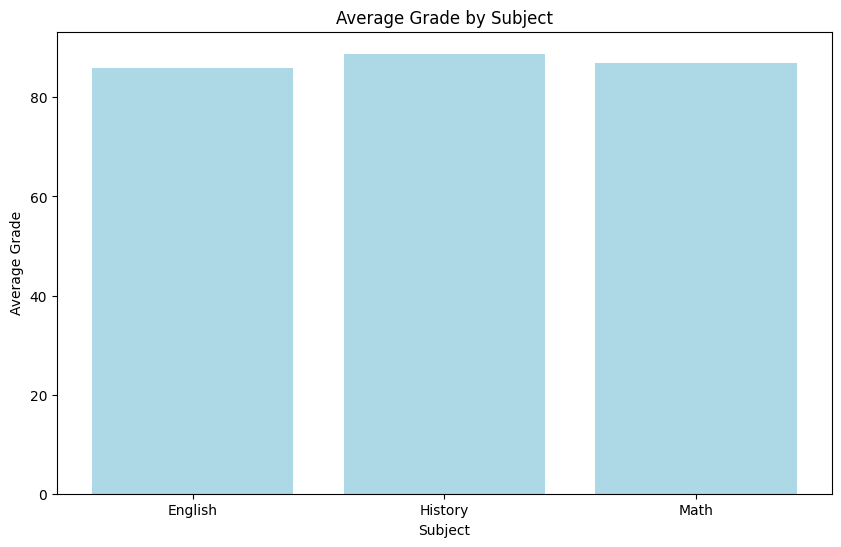

In [14]:
# Get DataFrame of the average grade for each subject
subject_avg_grade_df = student_grade_subject_df.groupby('subject')['grade'].mean().reset_index()

# Double check that it looks right
print("Average Grade by Subject:")
print(subject_avg_grade_df)

# Plot the DataFrame
plt.figure(figsize=(10,6))
plt.bar(subject_avg_grade_df['subject'], subject_avg_grade_df['grade'], color='lightblue')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade by Subject')
plt.show()

# Bonus Task

Implement a query that find the student with the highest grade in each subject

In [15]:
highest_grade_per_subject_df = pd.read_sql_query('''SELECT grades.subject, students.first_name || ' ' || students.last_name AS full_name, MAX(grades.grade) AS highest_grade
                  FROM students
                  JOIN grades ON students.student_id = grades.student_id
                  GROUP BY grades.subject''', connection)

print("Student with the highest grade in each subject:")
print(highest_grade_per_subject_df)

Student with the highest grade in each subject:
   subject    full_name  highest_grade
0  English  Carol White             98
1  History  Carol White             92
2     Math  Carol White             99


Visualize the results using a grouped bar chart

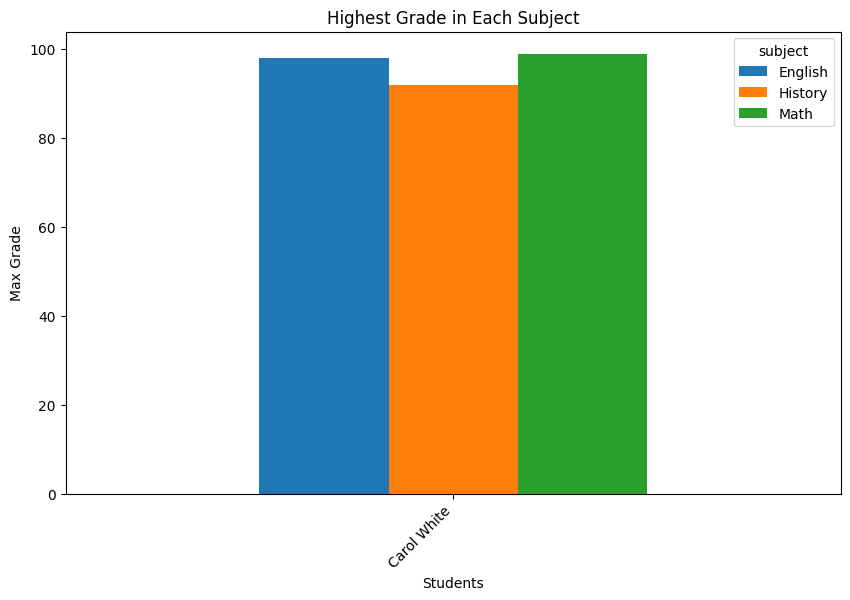

In [16]:
# Reformat the DataFrame
pivot_df = highest_grade_per_subject_df.pivot(index='full_name', columns='subject', values='highest_grade').fillna(0)

# Plot the grouped bar chart
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Students')
plt.ylabel('Max Grade')
plt.title('Highest Grade in Each Subject')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
connection.close()